# Data Science Internship Project

- **Intern**: Arthur Melo from Centre College, United States (January 5-25 2024)
- **Supervisor**: Joaquín Zambrano

## Worksite & Project Goal

_The Instituto Nacional de Estadística y Geografía (INEGI), or the National Institute of Statistics and Geography, is an autonomous agency of the Mexican Government dedicated to coordinating the country's national system of statistical and geographical information. It plays a vital role in collecting and analyzing data across various sectors in Mexico_



- _The objective of this analysis is to **describe factors of municipal development and determine which variables have the most influence on the outcome of development** based on sociodemographic, economic, and land/vegetation factors._
- 
_In doing so, I aim **to assist INEGI in their goal to identify key metrics for governmental resource allocation based on feature importance machine learning algorithms** that helps us rank sociodemographic, economic, and land variables in order of influence of the overall development index of municipalities._

# Part 1: Data preprocessing and Exploratory Data Analysis (EDA)

Import relevant libraries for data preprocessing

In [54]:
import pandas as pd # to create dataframe objects from data tables

from sklearn.preprocessing import MinMaxScaler # to normalize numerical data

scaler = MinMaxScaler() # scaler (normalizer) object

# for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Brief comment on the specific municipalities

- All three tables I load below come from INEGI's database on three states: Campeche, Yucatan, and Quintana Ro. We will focus on these three as a way to model an analysis that can be later scaled up by INEGI for the entire nation.

### Table 1: sociodemographic data

In [2]:
# Load file as a dataframe using the pandas library
tabla_1_original = pd.read_excel('tabla1.xlsx')

# creating a copy just in case
tabla1copia = tabla_1_original.copy() 
tabla_1_original.describe()

Clave Entidad  Clave Municipio   Clave Unica  Indicador bienestar  \
count     128.000000       128.000000    128.000000           128.000000   
mean       27.992188        45.335938  28037.523438             0.508257   
std         7.717957        33.269190   7733.464161             0.142783   
min         4.000000         1.000000   4001.000000             0.075446   
25%        31.000000        11.000000  31010.750000             0.411379   
50%        31.000000        42.500000  31042.500000             0.505192   
75%        31.000000        74.250000  31074.250000             0.606882   
max        31.000000       106.000000  31106.000000             0.869306   

       INDICADOR DE REZAGO EDUCATIVO  \
count                     128.000000   
mean                        0.288824   
std                         0.070175   
min                         0.130116   
25%                         0.238855   
50%                         0.289986   
75%                         0.336578   
max                         0.456171   

       INDICADOR DE REZAGO EDUCATIVO 2020\nNormalizado  \
count                                       128.000000   
mean                                          0.486761   
std                                           0.221872   
min                                           0.000000   
25%                                           0.340772   
50%                                           0.463570   
75%                                           0.641170   
max                                           1.000000   

       Grado promedio de escolaridad (15 años y más)  \
count                                     128.000000   
mean                                        7.896826   
std                                         1.076891   
min                                         6.110050   
25%                                         7.081934   
50%                                         7.735973   
75%                                         8.394262   
max                                        11.320363   

       Grado promedio de escolaridad de la población femenina (15 años y más)  \
count                                         128.000000                        
mean                                            7.834120                        
std                                             1.082671                        
min                                             6.011191                        
25%                                             7.073009                        
50%                                             7.555438                        
75%                                             8.393883                        
max                                            11.153290                        

       Grado promedio de escolaridad de la población masculina (15 años y más)  \
count                                         128.000000                         
mean                                            7.960864                         
std                                             1.105535                         
min                                             6.200586                         
25%                                             7.109195                         
50%                                             7.728663                         
75%                                             8.440353                         
max                                            11.501300                         

       Tasa de analfabetismo (15 años y más)  ...  \
count                             128.000000  ...   
mean                                0.100178  ...   
std                                 0.042830  ...   
min                                 0.013866  ...   
25%                                 0.071372  ...   
50%                                 0.100544  ...   
75%                                 0.130370  ...   
max                                 0.20

- 8 rows, 336 columns, which means we have a dataset with a large number of fields or variables to consider
- Up next, I manually select the columns that interest me in the analysis after a discussion of the most revelant sociodemographic features with my supervisor at INEGI

In [3]:
# creating list of most relevant columns from table 1
tabla_1_lista_colunas = ['Clave Unica', 'Entidad', 'Municipio', 'INDICADOR DE REZAGO EDUCATIVO', 'INDICADOR CARENCIA A SERVICIOS DE SALUD',
                        'INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL', 
                         'INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA',
                        'INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN', 
                         'INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA']

- This manual selection gets the variables of the original spreadsheet provided by INEGI, and all of them reflect the institute's needs for analysis.

In [4]:
tabla_1_seleccionadas = tabla_1_original[tabla_1_lista_colunas].copy()

tabla_1_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Clave Unica                                                        128 non-null    int64  
 1   Entidad                                                            128 non-null    object 
 2   Municipio                                                          128 non-null    object 
 3   INDICADOR DE REZAGO EDUCATIVO                                      128 non-null    float64
 4   INDICADOR CARENCIA A SERVICIOS DE SALUD                            128 non-null    float64
 5   INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL             128 non-null    float64
 6   INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA  128 non-null    float64
 7   INDICADOR CARENCIA POR ACCE

- Most of the variables we extracted from table 1 have to do with shortages (carencia) and delays (rezago) in important social indexes, like education, health services, social security, nutrition, etc
- Clave Unica is the primary key that will connect this table to the other ones. We will rename this appropriately soon so there's a match for the relationship between tables
- Entidad is the Mexican state for each entry
- Municipio is the municipality we're studying (each row contains data for a municipality, which is the lowest level of our analysis.

### Table 2: Land, vegetation, and geographic data

In [5]:
# loading data
tabla_2_original = pd.read_excel('tabla_2.xlsx')

tabla2copia = tabla_2_original.copy() # copy

# show preview
tabla_2_original.head()

ENT_FED           NOM_MUN  CVEGEO NOMBRE_MUNICIPIO  SUPGEOG_TOTAL  \
0  04 CAM      001 CalkinÃ­    4001         CalkinÃ­  173043.123603   
1  04 CAM      002 Campeche    4002         Campeche  323735.146513   
2  04 CAM        003 Carmen    4003           Carmen  857131.946178   
3  04 CAM    004 ChampotÃ³n    4004       ChampotÃ³n  657233.926072   
4  04 CAM  005 HecelchakÃ¡n    4005     HecelchakÃ¡n  127492.221153   

   SUP_CARTOG_AG  SUP_CARTOG_FO  SUP_CARTOG_SIN_AG    SUP_URBANA  \
0     90664.4174      4084.4124         75793.9757   3165.954204   
1    187803.6081      2595.4018        123904.9618   9531.807685   
2    410161.4432     23200.3822        392073.7785  31695.651461   
3    280237.7458    157326.2713        210507.5899   8227.324295   
4     36100.1727     17777.6703         71673.4399   1945.688735   

   %SUP_CARTOG_AG  ...  KM2_VEGETACION_SECUNDARIA  KM2_ZONA_URBANA  \
0       52.394117  ...                 701.224321        23.532899   
1       58.011498  ...                2224.521368        70.866636   
2       47.852778  ...                1741.432485        51.235066   
3       42.638965  ...                3469.305202        39.835486   
4       28.315588  ...                 794.295600        16.793198   

     KM2_TOTAL  %KM2_AGRICOLA_PECUARIO_FORESTAL  %KM2_CUERPO_DE_AGUA  \
0  1730.329555                         9.154646             0.703275   
1  3237.164899                        27.170696             0.056229   
2  8557.168638                        26.136556            23.474701   
3  6571.533471                        22.908495             0.125952   
4  1274.903070                        22.460424             0.007056   

   %KM2_SUELO_DESNUDO  %KM2_VEGETNACION_INDUCIDA  %KM2_VEGETACION_PRIMARIA  \
0            8.142127                   2.257394                 37.857056   
1            0.177428                   0.000000                  1.688292   
2            0.769416                   0.000000                 28.670020   
3            0.038896                   0.098195                 23.429346   
4            1.358549                   4.793529                  7.760797   

   %KM2_VEGETACION_SECUNDARIA  %KM2_ZONA_URBANA  
0                   40.525478          1.360024  
1                   68.718197          2.189157  
2                   20.350569          0.598739  
3                   52.792932          0.606182  
4                   62.302431          1.317214  

[5 rows x 28 columns]

Here we have 28 columns, and 24 of them show variables related to geographic aspects of the municipalities

In [6]:
# una seleccióon de colunas importantes de tabla 2

tabla_2_lista_colunas = ['CVEGEO','NOM_MUN', 'ENT_FED', '%SUP_CARTOG_AG', '%SUP_CARTOG_FO',
                        '%SUP_CARTOG_FO', '%SUP_CARTOG_SIN_AG', '%SUP_URBANA', '%KM2_AGRICOLA_PECUARIO_FORESTAL',
                        '%KM2_CUERPO_DE_AGUA', '%KM2_SUELO_DESNUDO',
                        '%KM2_VEGETNACION_INDUCIDA','%KM2_VEGETACION_PRIMARIA','%KM2_VEGETACION_SECUNDARIA',
                        '%KM2_ZONA_URBANA']

- Again, upon conversations with INEGI workers, we have agreed to filter out of the table 2 the fields above for our analysis.

After loading the data from table 2, we proceed to select columns about the vegetation and land features. Note that the primary key is named CVEGEO, and that is the unique identifier of municipalities.

In [55]:
# renaming dataframe column
tabla_1_seleccionadas.rename(columns={'Clave Unica': 'CVEGEO'}, inplace=True)

tabla_1_seleccionadas.head()

CVEGEO   Entidad    Municipio  INDICADOR DE REZAGO EDUCATIVO  \
0    4001  Campeche      Calkiní                       0.222952   
1    4002  Campeche     Campeche                       0.140597   
2    4003  Campeche       Carmen                       0.169827   
3    4004  Campeche    Champotón                       0.258318   
4    4005  Campeche  Hecelchakán                       0.189227   

   INDICADOR CARENCIA A SERVICIOS DE SALUD  \
0                                 0.170631   
1                                 0.164864   
2                                 0.211633   
3                                 0.160686   
4                                 0.138748   

   INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL  \
0                                           0.814027        
1                                           0.654233        
2                                           0.703271        
3                                           0.855105        
4                                           0.806676        

   INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA  \
0                                           0.516603                   
1                                           0.131241                   
2                                           0.299974                   
3                                           0.415440                   
4                                           0.558005                   

   INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN  \
0                                         0.128442   
1                                         0.117671   
2                                         0.197049   
3                                         0.178033   
4                                         0.093242   

   INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA  
0                                           0.174350   
1                                           0.071009   
2                                           0.177355   
3                                           0.161395   
4                                           0.151066

Now that the primary key is renamed to match the other tables, we will proceed with our data preprocessing.

In [8]:
tabla_2_seleccionadas = tabla_2_original[tabla_2_lista_colunas]


tabla_2_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CVEGEO                           130 non-null    int64  
 1   NOM_MUN                          130 non-null    object 
 2   ENT_FED                          130 non-null    object 
 3   %SUP_CARTOG_AG                   130 non-null    float64
 4   %SUP_CARTOG_FO                   130 non-null    float64
 5   %SUP_CARTOG_FO                   130 non-null    float64
 6   %SUP_CARTOG_SIN_AG               130 non-null    float64
 7   %SUP_URBANA                      130 non-null    float64
 8   %KM2_AGRICOLA_PECUARIO_FORESTAL  130 non-null    float64
 9   %KM2_CUERPO_DE_AGUA              130 non-null    float64
 10  %KM2_SUELO_DESNUDO               130 non-null    float64
 11  %KM2_VEGETNACION_INDUCIDA        130 non-null    float64
 12  %KM2_VEGETACION_PRIMAR

Again, we have variables like the primary key CVEGEO, the name of the municipality (NOM_MUN) and the of entity/state (ENT_FED). Everything else represents various data columns with information on vegetation, percentage of urban zone, etc.

In [9]:
tabla_2_seleccionadas.head()

CVEGEO           NOM_MUN ENT_FED  %SUP_CARTOG_AG  %SUP_CARTOG_FO  \
0    4001      001 CalkinÃ­  04 CAM       52.394117        2.360344   
1    4002      002 Campeche  04 CAM       58.011498        0.801705   
2    4003        003 Carmen  04 CAM       47.852778        2.706746   
3    4004    004 ChampotÃ³n  04 CAM       42.638965       23.937637   
4    4005  005 HecelchakÃ¡n  04 CAM       28.315588       13.944122   

   %SUP_CARTOG_FO  %SUP_CARTOG_SIN_AG  %SUP_URBANA  \
0        2.360344           43.800628     1.829575   
1        0.801705           38.273559     2.944323   
2        2.706746           45.742523     3.697873   
3       23.937637           32.029325     1.251811   
4       13.944122           56.217893     1.526123   

   %KM2_AGRICOLA_PECUARIO_FORESTAL  %KM2_CUERPO_DE_AGUA  %KM2_SUELO_DESNUDO  \
0                         9.154646             0.703275            8.142127   
1                        27.170696             0.056229            0.177428   
2                        26.136556            23.474701            0.769416   
3                        22.908495             0.125952            0.038896   
4                        22.460424             0.007056            1.358549   

   %KM2_VEGETNACION_INDUCIDA  %KM2_VEGETACION_PRIMARIA  \
0                   2.257394                 37.857056   
1                   0.000000                  1.688292   
2                   0.000000                 28.670020   
3                   0.098195                 23.429346   
4                   4.793529                  7.760797   

   %KM2_VEGETACION_SECUNDARIA  %KM2_ZONA_URBANA  
0                   40.525478          1.360024  
1                   68.718197          2.189157  
2                   20.350569          0.598739  
3                   52.792932          0.606182  
4                   62.302431          1.317214

### Tabla 3: Economic data

This is the final table for our analysis.In doing so, we will unify the three of them to provide a comprehensive feature importance model.

In [10]:
# creating data frame object

tabla_3_original = pd.read_excel('tabla_3.xlsx')
tabla3copia = tabla_3_original.copy() # copy

tabla_3_original.head()


ENTIDAD  MUNICIPIO  CVEGEO          NOM_MUN  ue_i     va_i    i_i  po_i  \
0        4          1    4001      001 Calkiní  1147   337851   4138  3999   
1        4          2    4002     002 Campeche   989  1050567  28253  5709   
2        4          3    4003       003 Carmen   708   241115  21154  2375   
3        4          4    4004    004 Champotón   289   639079  12699  2360   
4        4          5    4005  005 Hecelchakán   107    21870    325   370   

      r_i  ue_c  ...  Sector52  Sector53  Sector54  Sector55  Sector56  \
0  258267  1036  ...  0.028537  0.002275  0.001926       0.0  0.074415   
1  282537  5557  ...  0.000000  0.009566  0.019079       0.0  0.000000   
2   75918  4457  ...  0.000360  0.004930  0.004166       0.0  0.005599   
3  221206  1758  ...  0.013328  0.004876  0.001522       0.0  0.003767   
4   12969   479  ...  0.021538  0.007457  0.007241       0.0  0.006781   

   Sector61  Sector62  Sector71  Sector72  Sector81  
0  0.000722  0.008487  0.002175  0.057048  0.025342  
1  0.018022  0.019630  0.004312  0.080851  0.022141  
2  0.000588  0.000202  0.000250  0.004372  0.005706  
3  0.002812  0.003315  0.000664  0.095936  0.021324  
4  0.001520  0.004276  0.001314  0.128566  0.026196  

[5 rows x 72 columns]

- 72 columns, and a total of 88 variables we can use for the analysis.

In [11]:
# una seleccióon de colunas importantes de tabla 1
tabla_3_lista_colunas = ['CVEGEO', 'NOM_MUN', 'ide','Total_UE_DEN', "pl", "re", "h_trab", "rem_horas", "ingr_2salarios", "PBT", "PC_PBT",
    "Sector11 ", "Sector21", "Sector22", "Sector23", "Sector31", "Sector43",
    "Sector46", "Sector48_49", "Sector51", "Sector52", "Sector53", "Sector54",
    "Sector55", "Sector56", "Sector61", "Sector62", "Sector71", "Sector72", "Sector81"]

Selecting relevant columns again. Initially, I selected all economic sectors even though there was an issue where before data preprocessing we had to input zeros in empty cells of sectors, but that was indicative of absense of a certain economic sector for a give municipality. I acknowledge that may skew the algorithm, but we will not be operating much based on those variables.

In [12]:
tabla_3_seleccionadas = tabla_3_original[tabla_3_lista_colunas]

tabla_3_seleccionadas.head()

CVEGEO          NOM_MUN       ide  Total_UE_DEN            pl  \
0    4001      001 Calkiní  0.321401          3641  1.093348e+05   
1    4002     002 Campeche  0.393307         15209  4.103087e+05   
2    4003       003 Carmen  0.414955         12074  6.708282e+06   
3    4004    004 Champotón  0.395667          4230  3.269785e+05   
4    4005  005 Hecelchakán  0.340185          1153  1.744897e+05   

             re  h_trab  rem_horas  ingr_2salarios         PBT  ...  Sector52  \
0   4333.472687   8.462   0.002451        0.789968    1417.620  ...  0.028537   
1   7465.025680   9.385   0.073367        0.677491   23411.225  ...  0.000000   
2  29035.966408   9.646  -3.085273        0.550290  559451.083  ...  0.000360   
3   5755.337174   6.381  -0.097472        0.819155    4124.768  ...  0.013328   
4   4660.881543   9.388   0.461690        0.804499     402.726  ...  0.021538   

   Sector53  Sector54  Sector55  Sector56  Sector61  Sector62  Sector71  \
0  0.002275  0.001926       0.0  0.074415  0.000722  0.008487  0.002175   
1  0.009566  0.019079       0.0  0.000000  0.018022  0.019630  0.004312   
2  0.004930  0.004166       0.0  0.005599  0.000588  0.000202  0.000250   
3  0.004876  0.001522       0.0  0.003767  0.002812  0.003315  0.000664   
4  0.007457  0.007241       0.0  0.006781  0.001520  0.004276  0.001314   

   Sector72  Sector81  
0  0.057048  0.025342  
1  0.080851  0.022141  
2  0.004372  0.005706  
3  0.095936  0.021324  
4  0.128566  0.026196  

[5 rows x 30 columns]

Now we have selected the key economic variables and are ready for the merging of dataframes.

### Data Inspection & Merging

Below, I do an outer join with the three tables.

In [13]:
union_df = pd.merge(tabla_1_seleccionadas, tabla_2_seleccionadas, on='CVEGEO', how='outer')
union_df = pd.merge(union_df, tabla_3_seleccionadas, on='CVEGEO', how='outer')
union_df.head()

CVEGEO   Entidad    Municipio  INDICADOR DE REZAGO EDUCATIVO  \
0    4001  Campeche      Calkiní                       0.222952   
1    4002  Campeche     Campeche                       0.140597   
2    4003  Campeche       Carmen                       0.169827   
3    4004  Campeche    Champotón                       0.258318   
4    4005  Campeche  Hecelchakán                       0.189227   

   INDICADOR CARENCIA A SERVICIOS DE SALUD  \
0                                 0.170631   
1                                 0.164864   
2                                 0.211633   
3                                 0.160686   
4                                 0.138748   

   INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL  \
0                                           0.814027        
1                                           0.654233        
2                                           0.703271        
3                                           0.855105        
4                                           0.806676        

   INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA  \
0                                           0.516603                   
1                                           0.131241                   
2                                           0.299974                   
3                                           0.415440                   
4                                           0.558005                   

   INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN  \
0                                         0.128442   
1                                         0.117671   
2                                         0.197049   
3                                         0.178033   
4                                         0.093242   

   INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA         NOM_MUN_x  ...  \
0                                           0.174350       001 CalkinÃ­  ...   
1                                           0.071009       002 Campeche  ...   
2                                           0.177355         003 Carmen  ...   
3                                           0.161395     004 ChampotÃ³n  ...   
4                                           0.151066   005 HecelchakÃ¡n  ...   

   Sector52  Sector53  Sector54  Sector55  Sector56  Sector61  Sector62  \
0  0.028537  0.002275  0.001926       0.0  0.074415  0.000722  0.008487   
1  0.000000  0.009566  0.019079       0.0  0.000000  0.018022  0.019630   
2  0.000360  0.004930  0.004166       0.0  0.005599  0.000588  0.000202   
3  0.013328  0.004876  0.001522       0.0  0.003767  0.002812  0.003315   
4  0.021538  0.007457  0.007241       0.0  0.006781  0.001520  0.004276   

   Sector71  Sector72  Sector81  
0  0.002175  0.057048  0.025342  
1  0.004312  0.080851  0.022141  
2  0.000250  0.004372  0.005706  
3  0.000664  0.095936  0.021324  
4  0.001314  0.128566  0.026196  

[5 rows x 52 columns]

- Now, we have a total of 52 rows describing each record (a municipality). Out of those, CVEGEO is the primary key to identify unique municipalities, Entidad is the state, and Municipio is the municipality. All other 49 variables will be analyzed so we can identify which of those contribute more to the 'ide' (development index) variable, a key indicator for the Mexican government to make policy making decisions. 

In [14]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 52 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   CVEGEO                                                             130 non-null    int64  
 1   Entidad                                                            128 non-null    object 
 2   Municipio                                                          128 non-null    object 
 3   INDICADOR DE REZAGO EDUCATIVO                                      128 non-null    float64
 4   INDICADOR CARENCIA A SERVICIOS DE SALUD                            128 non-null    float64
 5   INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL             128 non-null    float64
 6   INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA  128 non-null    float64
 7   INDICADOR CARENCIA POR ACC

### Municipalities of with highest and lowest development index (IDE)

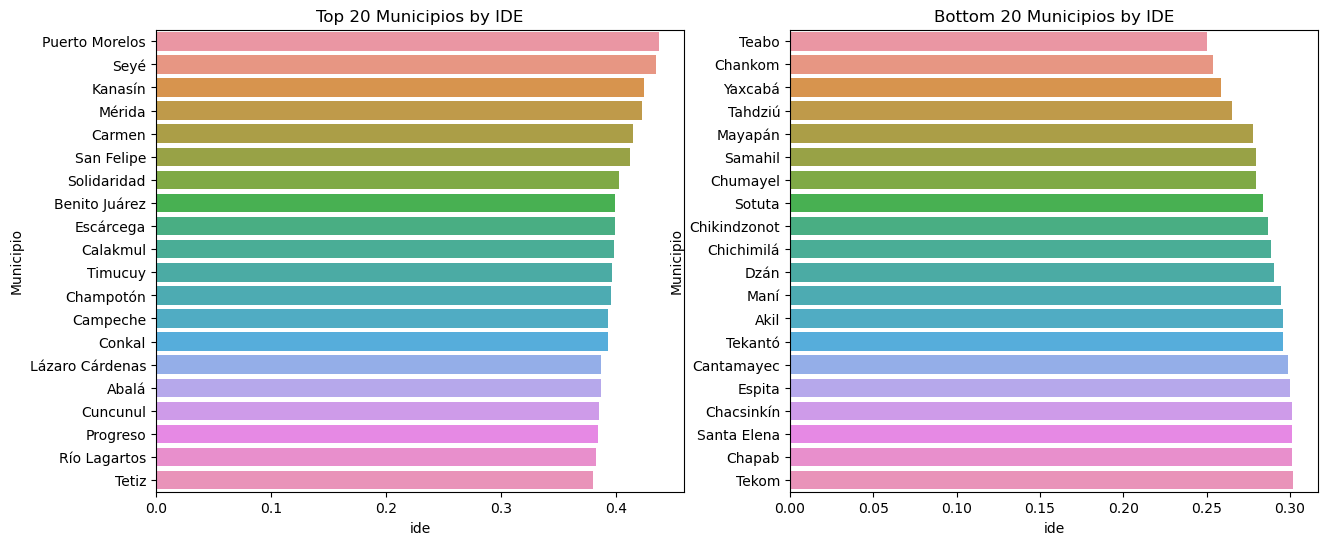

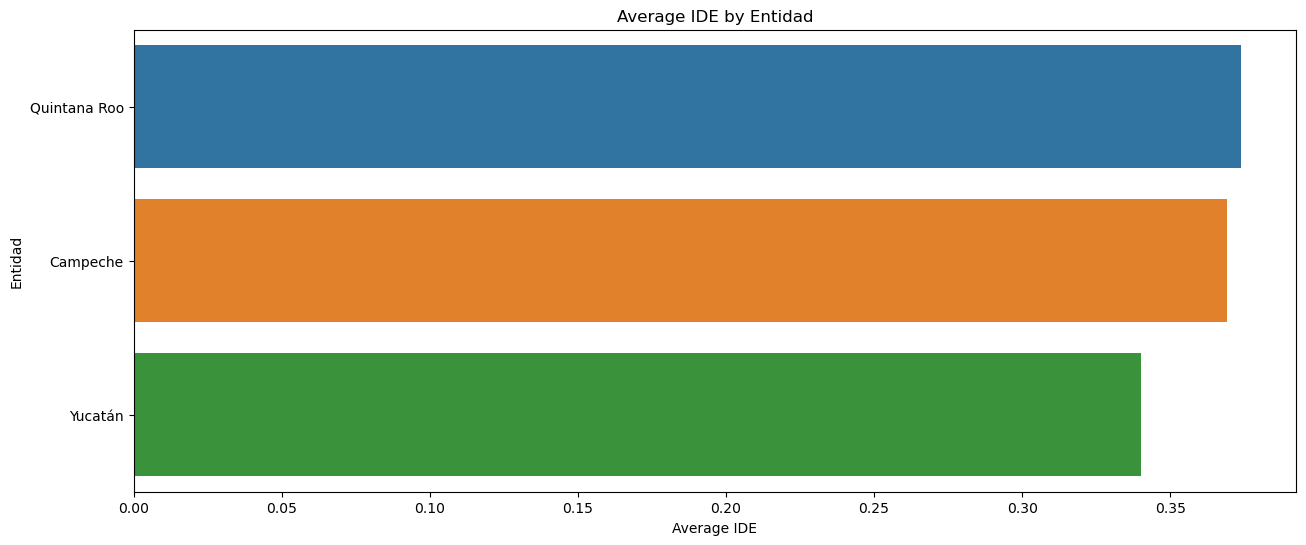

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'union_df' is your DataFrame

# Top 20 'municipios' in terms of the 'ide' variable
top_20_municipios = union_df.nlargest(20, 'ide')[['Municipio', 'ide']]

# Bottom 20 'municipios' in terms of the 'ide' variable
bottom_20_municipios = union_df.nsmallest(20, 'ide')[['Municipio', 'ide']]

# Group by 'Entidad' and rank them in a bar chart by their average 'ide'
grouped_by_entidad = union_df.groupby('Entidad')['ide'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='ide', y='Municipio', data=top_20_municipios)
plt.title('Top 20 Municipios by IDE')

plt.subplot(1, 2, 2)
sns.barplot(x='ide', y='Municipio', data=bottom_20_municipios)
plt.title('Bottom 20 Municipios by IDE')

plt.figure(figsize=(15, 6))
sns.barplot(x=grouped_by_entidad.values, y=grouped_by_entidad.index)
plt.title('Average IDE by Entidad')
plt.xlabel('Average IDE')
plt.ylabel('Entidad')

plt.show()


- The highest IDE is that of Puerto Morelos. The very lowest is that of Teabo. 
- Mérida is in the top 3 for IDE as expected, but we will later remove Mérida from the analysis since it adds a lot of bias due to its disproportional socioeconomic indicators. It would need its own separate analysis.

### Correcting missing values in two of the tables

In [15]:
# union_df is the DataFrame resulting from the outer merge

# Identify missing values in the DataFrame
missing_values = union_df.isnull().sum()


# Display the missing values and their percentages
missing_info = pd.DataFrame({
    'missing_values': missing_values   
})

# Sort the DataFrame by the number of missing values in descending order
missing_info_sorted = missing_info[missing_info['missing_values'] > 0].sort_values(by='missing_values', ascending=False)

print(missing_info_sorted)


                                                    missing_values
Entidad                                                          2
Sector21                                                         2
Sector23                                                         2
Sector31                                                         2
Sector43                                                         2
Sector46                                                         2
Sector48_49                                                      2
Sector51                                                         2
Sector52                                                         2
Sector53                                                         2
Sector54                                                         2
Sector55                                                         2
Sector56                                                         2
Sector61                                                      

Here, we see that one of the three tables has 130 entries instead of 128 like the other ones. That happened because Mexico has created new municipalities in the state of Campeche, and there's no new data for them yet for the other two tables.

In [16]:
# tabla_1_seleccionadas, tabla_2_seleccionadas, and tabla_3_seleccionadas are our dataframes 

# Identify unique CVEGEO values in tabla_2_seleccionadas that are not in tabla_1_seleccionadas and tabla_3_seleccionadas
unique_to_tabla_2 = tabla_2_seleccionadas[~tabla_2_seleccionadas['CVEGEO'].isin(tabla_1_seleccionadas['CVEGEO']) & ~tabla_2_seleccionadas['CVEGEO'].isin(tabla_3_seleccionadas['CVEGEO'])]

# Display the unique CVEGEO values
print(unique_to_tabla_2.head())


    CVEGEO          NOM_MUN ENT_FED  %SUP_CARTOG_AG  %SUP_CARTOG_FO  \
11    4012   012 Seybaplaya  04 CAM       40.900089             0.0   
12    4013  013 DzitbalchÃ©  04 CAM       16.974753             0.0   

    %SUP_CARTOG_FO  %SUP_CARTOG_SIN_AG  %SUP_URBANA  \
11             0.0           60.058579     1.949335   
12             0.0           79.084675     2.134312   

    %KM2_AGRICOLA_PECUARIO_FORESTAL  %KM2_CUERPO_DE_AGUA  %KM2_SUELO_DESNUDO  \
11                        30.763629             0.397618            0.338827   
12                        33.806212             0.000000            0.052712   

    %KM2_VEGETNACION_INDUCIDA  %KM2_VEGETACION_PRIMARIA  \
11                   0.790932                  0.060353   
12                   1.016870                  0.000000   

    %KM2_VEGETACION_SECUNDARIA  %KM2_ZONA_URBANA  
11                   66.075323          1.573317  
12                   62.402684          2.721522  


- From the analysis above, we identify which municipalities are extra in Table 2 but are not present in tables 1 and 3: Seybaplaya and Dzitbalché
- They're both identified by ENT_FED (federal entity or state) as CAM, which stands for the state of Campeche.

- Below we use the primary key codes to remove three municipalities: 
    - Mérida (the capital of Yucatan, which often creates a huge bias in the economic analysis since it is disproportionally bigger than all other cities in its state and Peninsula, therefore it needs to be analyzed separetely)
    - Seybaplaya (in the state of Campeche) 
    - Dzitbalché (in the state of Campeche) 

In [17]:
# Values to remove
values_to_remove = [4012, 4013, 31050]

# Remove rows where 'Column2' has any of the values in 'values_to_remove'
filtered_df = union_df[~union_df['CVEGEO'].isin(values_to_remove)]

print(filtered_df)

     CVEGEO   Entidad    Municipio  INDICADOR DE REZAGO EDUCATIVO  \
0      4001  Campeche      Calkiní                       0.222952   
1      4002  Campeche     Campeche                       0.140597   
2      4003  Campeche       Carmen                       0.169827   
3      4004  Campeche    Champotón                       0.258318   
4      4005  Campeche  Hecelchakán                       0.189227   
..      ...       ...          ...                            ...   
123   31102   Yucatán   Valladolid                       0.219696   
124   31103   Yucatán      Xocchel                       0.300116   
125   31104   Yucatán      Yaxcabá                       0.356784   
126   31105   Yucatán     Yaxkukul                       0.176328   
127   31106   Yucatán       Yobaín                       0.204063   

     INDICADOR CARENCIA A SERVICIOS DE SALUD  \
0                                   0.170631   
1                                   0.164864   
2                          

## Data cleaning

### Checking missing values

In [18]:
# Find missing values
missing_values = filtered_df.isna().sum()

# Print the count of missing values in each column
print(missing_values)

CVEGEO                                                               0
Entidad                                                              0
Municipio                                                            0
INDICADOR DE REZAGO EDUCATIVO                                        0
INDICADOR CARENCIA A SERVICIOS DE SALUD                              0
INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL               0
INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA    0
INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN                      0
INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA                   0
NOM_MUN_x                                                            0
ENT_FED                                                              0
%SUP_CARTOG_AG                                                       0
%SUP_CARTOG_FO                                                       0
%SUP_CARTOG_FO                                                       0
%SUP_C

No missing values after the elimination of the two municipalities that were recenty created and whose data we don't quite know yet.

### Dropping non-numerical columns

In [19]:
# Specify the columns to drop
columns_to_drop = ['CVEGEO', 'NOM_MUN_y', 'ENT_FED', 'NOM_MUN_x', 'Municipio', 'Entidad']

# Drop the specified columns and create a new DataFrame
data_4_models = filtered_df.drop(columns_to_drop, axis=1)


print(data_4_models)

     INDICADOR DE REZAGO EDUCATIVO  INDICADOR CARENCIA A SERVICIOS DE SALUD  \
0                         0.222952                                 0.170631   
1                         0.140597                                 0.164864   
2                         0.169827                                 0.211633   
3                         0.258318                                 0.160686   
4                         0.189227                                 0.138748   
..                             ...                                      ...   
123                       0.219696                                 0.212139   
124                       0.300116                                 0.315180   
125                       0.356784                                 0.125491   
126                       0.176328                                 0.211533   
127                       0.204063                                 0.111061   

     INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDA

### Handling our dependent variable & normalizing other columns

- After some discussion with my coordinator, we have agreed that we will use ide (development index) as the dependent varible in our analysis. Our goal will be to verify which independent variables contribute the most to this index, which encompasses sociodemographic and land/vegetation data directly or indireclty.

- Once we know which variables influence our development index of each municipality the most, we shall filter the data even more so we focus on the most revelant columns for the predictive analysis with Machine Learning models.

In [21]:
if 'ide' in data_4_models.columns:
    # Normalize the 'ide' column
    data_4_models['ide_normalized'] = scaler.fit_transform(data_4_models[['ide']])

    # Compute the median of the normalized 'ide'
    ide_median = data_4_models['ide_normalized'].median()

    # Create the binary categorical column
    data_4_models['ide_binary'] = (data_4_models['ide_normalized'] > ide_median).astype(int)

    # Proceed with normalizing the other columns (excluding 'ide', 'ide_normalized', and 'ide_binary')
    other_columns = data_4_models.columns.difference(['ide', 'ide_normalized', 'ide_binary'])
    data_4_models[other_columns] = scaler.fit_transform(data_4_models[other_columns])

    success = True
else:
    success = False

success, data_4_models.head()  # Display success status and the first few rows of the DataFrame



(True,
    INDICADOR DE REZAGO EDUCATIVO  INDICADOR CARENCIA A SERVICIOS DE SALUD  \
 0                       0.260970                                 0.443325   
 1                       0.000000                                 0.426676   
 2                       0.092623                                 0.561695   
 3                       0.373039                                 0.414613   
 4                       0.154100                                 0.351279   
 
    INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL  \
 0                                           0.575001        
 1                                           0.155506        
 2                                           0.284244        
 3                                           0.682841        
 4                                           0.555704        
 
    INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA  \
 0                                           0.508431                   
 1 

- Here I just normalized all numerical variables using a MinMax Scaler since we want to be consistent across all the data. 
- I also created a binary variable based on 'ide'. If the normalized development index is above the median of all indexes, then it gets assigned a 1 and it means it's a really good 'ide'. If not, we assign it a zero and it means it is 'not good enough.'
    - In doing so, I lay the foundation for the classification analysis.

In [39]:
# Check the distribution of the binary target variable 'ide_binary'
ide_binary_distribution = data_4_models['ide_binary'].value_counts()

ide_binary_distribution

0    64
1    63
Name: ide_binary, dtype: int64

- Class 0 (a 'not good' development index (IDE), which is below the median): 64 municipalities
- Class 1 (a 'good' development index (IDE), which is above the median): 63 municipalities

#### Disclaimer about classifying municipalities
- We did this classification as a way to break down our developmental variable so we can have a binary variable for classification machine learning models. The feature importance we get out of those models can later be used for the institute's final goal of creating a classification/ranking system for the municipalities.

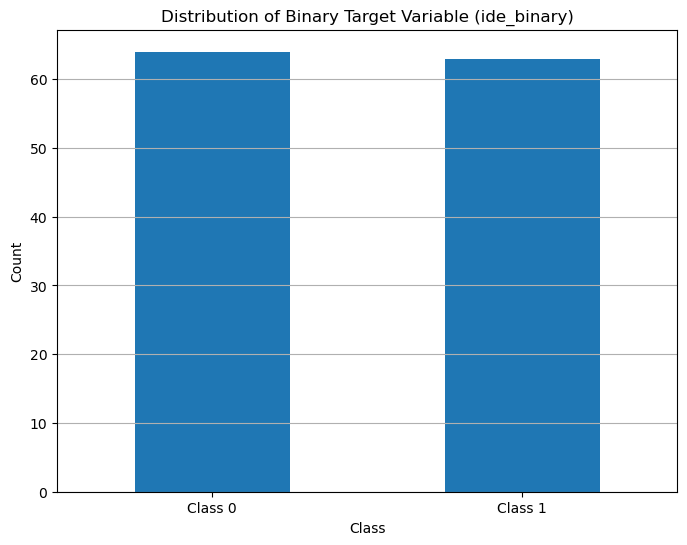

In [40]:
import matplotlib.pyplot as plt

# Plotting the distribution of 'ide_binary'
plt.figure(figsize=(8, 6))
ide_binary_distribution.plot(kind='bar')
plt.title('Distribution of Binary Target Variable (ide_binary)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)  # Adjust x-ticks for clarity
plt.grid(axis='y')
plt.show()


Balanced distribution of the dependent variable for development index, which means our dataset is balanced since our approach was to do the binary split around the median. By choosing the median, we are reducing the chances of outliers impacting the division and causing an imbalance, which is more likely when you take the mean.

In [22]:
# Moving 'ide' and 'ide_normalized' to be among the first columns of the DataFrame
ide_columns = ['ide_normalized']
other_columns = [col for col in data_4_models.columns if col not in ide_columns]

# Reorder the DataFrame
data_4_models_reordered = data_4_models[ide_columns + other_columns]

#data_4_models_reordered.drop('ide', axis=1)

data_4_models_reordered.head()  # Display the first few rows of the reordered DataFrame

ide_normalized  INDICADOR DE REZAGO EDUCATIVO  \
0        0.378882                       0.260970   
1        0.762999                       0.000000   
2        0.878642                       0.092623   
3        0.775607                       0.373039   
4        0.479223                       0.154100   

   INDICADOR CARENCIA A SERVICIOS DE SALUD  \
0                                 0.443325   
1                                 0.426676   
2                                 0.561695   
3                                 0.414613   
4                                 0.351279   

   INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL  \
0                                           0.575001        
1                                           0.155506        
2                                           0.284244        
3                                           0.682841        
4                                           0.555704        

   INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA  \
0                                           0.508431                   
1                                           0.077949                   
2                                           0.266438                   
3                                           0.395423                   
4                                           0.554680                   

   INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN  \
0                                         0.411424   
1                                         0.360981   
2                                         0.732735   
3                                         0.643677   
4                                         0.246571   

   INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA  %SUP_CARTOG_AG  \
0                                           0.321924         0.568281   
1                                           0.051273         0.632652   
2                                           0.329792         0.516240   
3                                           0.287993         0.456494   
4                                           0.260942         0.292358   

   %SUP_CARTOG_FO  %SUP_CARTOG_FO  ...  Sector53  Sector54  Sector55  \
0        0.035588        0.035588  ...  0.017492  0.047754       0.0   
1        0.012088        0.012088  ...  0.073557  0.472942       0.0   
2        0.040810        0.040810  ...  0.037910  0.103280       0.0   
3        0.360914        0.360914  ...  0.037493  0.037722       0.0   
4        0.210239        0.210239  ...  0.057335  0.179484       0.0   

   Sector56  Sector61  Sector62  Sector71  Sector72  Sector81  ide_binary  
0  0.567949  0.014990  0.263387  0.009237  0.076786  0.215020           0  
1  0.000000  0.373977  0.609224  0.018309  0.108824  0.187862           1  
2  0.042734  0.012200  0.006267  0.001062  0.005885  0.048413           1  
3  0.028747  0.058344  0.102884  0.002820  0.129130  0.180933           1  
4  0.051756  0.031535  0.132702  0.005577  0.173049  0.222272           0  

[5 rows x 50 columns]

Just a little moving around of columns so our target variable 'ide' is more easily seen.

# Part 2: Machine Learning Models for Feature Importance

## Data splitting with a validation set

- Let's proceed by partitioning the data into test, traning, and validation sets for our machine learning models.

In [56]:
# Exclude 'ide' and 'ide_normalized' from the features
X = data_4_models_reordered.drop(['ide', 'ide_normalized', 'ide_binary'], axis=1)

# our target variable is the binary IDE
y = data_4_models_reordered['ide_binary']

In [24]:
# Initial train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

### Feature importance Algorithm

- We will start with the Random Forest Classifier. Here's a couple reasons why:

    - Robustness to Overfitting: Random Forest classifiers are less likely to overfit compared to simpler models, as they average the results of numerous decision trees, each trained on a subset of the data and features. This inherent diversity in the model helps in obtaining a more generalized understanding of feature importance.

    - Handling of Non-Linear Relationships: Random Forests can naturally handle non-linear relationships between features and the target variable. This ability allows for a more accurate assessment of feature importance, even in complex datasets where relationships are not straightforward.


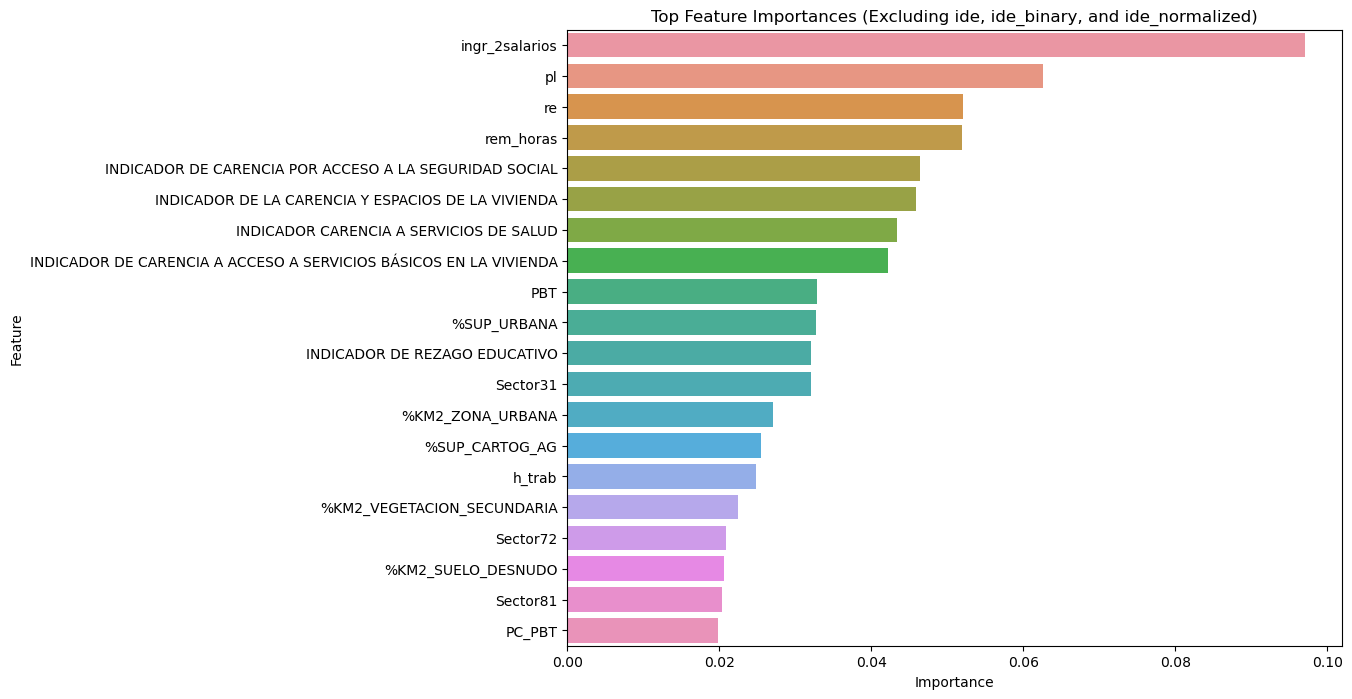

In [25]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

feature_importances = pd.DataFrame({'feature': X_train.columns, 
                                    'importance': random_forest.feature_importances_})

# Sort features according to importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Select top N features
top_features = feature_importances.head(20)  # top 20

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top Feature Importances (Excluding ide, ide_binary, and ide_normalized)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Bar chart above shows the top 20 features out of the initial 49 of the merged dataframe that contribute the most to our target variable 'ide'

In [60]:
# Get the list of top 20 feature names
top_20_feature_names = top_features['feature'].tolist()

# Use this list to create a new DataFrame from your original data
new_dataframe = X_train[top_20_feature_names]


# Python list
top_20_feature_names = [
    'ingr_2salarios', 'pl', 're', 'rem_horas',
    'INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL',
    'INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA',
    'INDICADOR CARENCIA A SERVICIOS DE SALUD',
    'INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA',
    'PBT', '%SUP_URBANA', 'INDICADOR DE REZAGO EDUCATIVO', 'Sector31',
    '%KM2_ZONA_URBANA', '%SUP_CARTOG_AG', 'h_trab',
    '%KM2_VEGETACION_SECUNDARIA', 'Sector72', '%KM2_SUELO_DESNUDO',
    'Sector81', 'PC_PBT'
]

# Display as a numbered ordered list
for i, feature in enumerate(top_20_feature_names, start=1):
    print(f"{i}. {feature} (Importance: {row.importance})")


1. ingr_2salarios (Importance: 0.017054302128190924)
2. pl (Importance: 0.017054302128190924)
3. re (Importance: 0.017054302128190924)
4. rem_horas (Importance: 0.017054302128190924)
5. INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL (Importance: 0.017054302128190924)
6. INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA (Importance: 0.017054302128190924)
7. INDICADOR CARENCIA A SERVICIOS DE SALUD (Importance: 0.017054302128190924)
8. INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA (Importance: 0.017054302128190924)
9. PBT (Importance: 0.017054302128190924)
10. %SUP_URBANA (Importance: 0.017054302128190924)
11. INDICADOR DE REZAGO EDUCATIVO (Importance: 0.017054302128190924)
12. Sector31 (Importance: 0.017054302128190924)
13. %KM2_ZONA_URBANA (Importance: 0.017054302128190924)
14. %SUP_CARTOG_AG (Importance: 0.017054302128190924)
15. h_trab (Importance: 0.017054302128190924)
16. %KM2_VEGETACION_SECUNDARIA (Importance: 0.017054302128190924)
17. Sector72 (Importa

- Ordered numbered list of the variables with the most influence/importance in development. 

### Model evaluation and comparison

In [44]:
y_pred = random_forest.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cross_val_accuracy.mean()}")

Accuracy: 0.7307692307692307
[[11  2]
 [ 5  8]]
ROC-AUC Score: 0.7307692307692308
Precision: 0.8
Recall: 0.6153846153846154
F1 Score: 0.6956521739130435
Cross-Validated Accuracy: 0.7476923076923075


- Accuracy: The model's accuracy is 73.08%, indicating that it correctly predicted approximately 73% of the outcomes in the test set.
- Confusion Matrix: The matrix shows 11 true positives, 8 true negatives, 2 false positives, and 5 false negatives.
- ROC-AUC Score: The ROC-AUC score is 73.08%, suggesting that the model has a good ability to distinguish between the classes.
- Precision: The precision score is 80%, meaning that when the model predicts a positive outcome, it is correct 80% of the time.
- Recall: The recall score is 61.54%, indicating that the model correctly identified approximately 62% of all actual positive cases.
- F1 Score: The F1 score, which balances precision and recall, is approximately 69.57%.
- Cross-Validated Accuracy: The average accuracy from cross-validation is 74.77%, showing consistent performance across different subsets of the data.

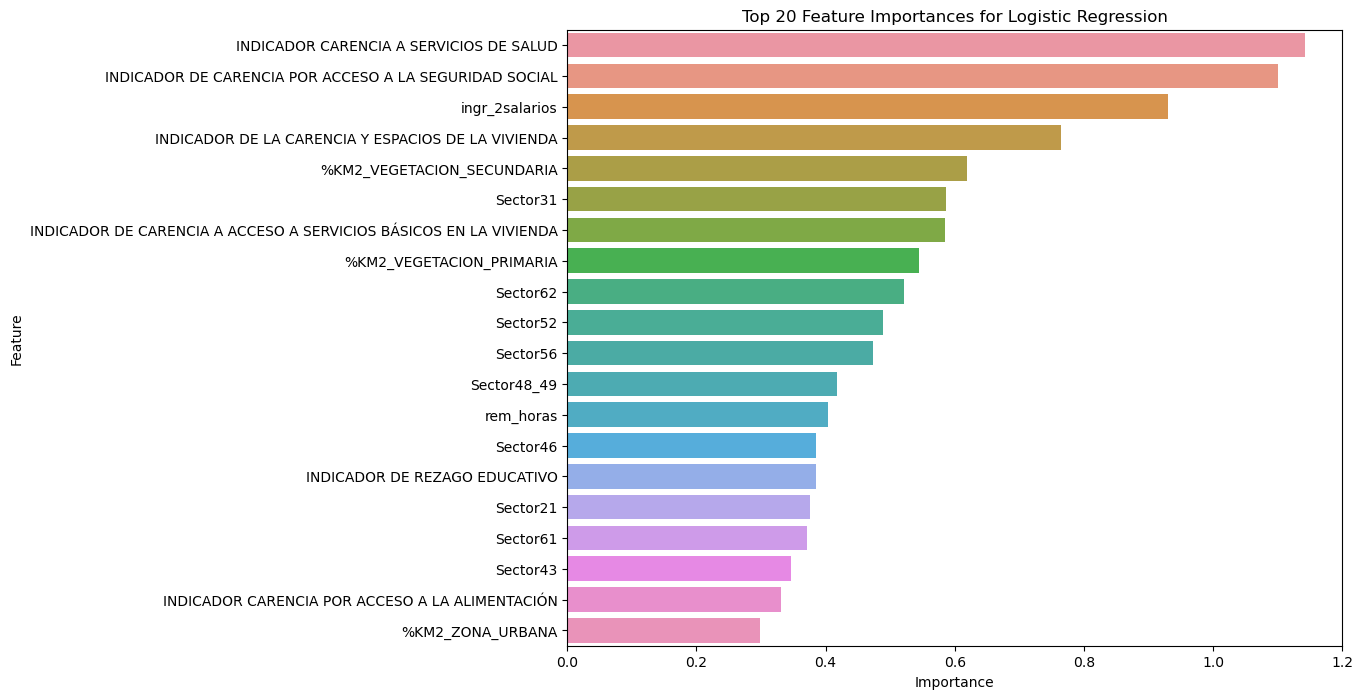

In [32]:
from sklearn.linear_model import LogisticRegression

# Fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get feature importances
importance_logreg = abs(logreg.coef_[0])

# Create a DataFrame for visualization
features_logreg = pd.DataFrame({'feature': X_train.columns, 'importance': importance_logreg})
features_logreg = features_logreg.sort_values('importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for Logistic Regression
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=features_logreg.head(20))
plt.title('Top 20 Feature Importances for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

- That's the feature importance bar chart ranking when we use Logistic Regression. We can tell it's significantly different than the graph generated after implementing random forests, which made me further inspect how effective this model is.

In [33]:
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg}")


conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix_logreg)

precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")

roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
print(f"ROC-AUC Score: {roc_auc_logreg}")


Accuracy: 0.5
[[8 5]
 [8 5]]
Precision: 0.5
Recall: 0.38461538461538464
F1 Score: 0.4347826086956522
ROC-AUC Score: 0.5


**Interpretation of Logistic Regression Model Results:**

- Accuracy: The logistic regression model's accuracy is 50%, which means it correctly predicted 50% of the outcomes in the test set.
- Confusion Matrix: The matrix shows 8 true positives, 5 true negatives, 5 false positives, and 8 false negatives.
- Precision: The precision score is 50%, indicating that when the logistic regression model predicts a positive outcome, it is correct half of the time.
- Recall: The recall score is 38.46%, suggesting that the model correctly identified approximately 38% of all actual positive cases.
- F1 Score: The F1 score is approximately 43.48%, which is lower, reflecting a less balanced performance between precision and recall.
- ROC-AUC Score: The ROC-AUC score is 50%, which is at the threshold of random chance, indicating poor discriminative ability.

Comparison with the Random Forest Model:

- Accuracy: The Random Forest model is significantly more accurate (73.08%) compared to the Logistic Regression model (50%).
- Precision and Recall: The Random Forest model also performs better in both precision (80% vs 50%) and recall (61.54% vs 38.46%).
- F1 Score: The Random Forest's F1 score (69.57%) is notably higher than that of the Logistic Regression model (43.48%), indicating a better balance between precision and recall.
- ROC-AUC Score: The Random Forest model's ROC-AUC score (73.08%) is much higher than the Logistic Regression's (50%), suggesting a superior ability to distinguish between classes.

**Overall, the Random Forest model outperforms the Logistic Regression model across all evaluated metrics in this scenario.**

### Hyperparameter tuning for random forest

Let's improve our Random Forest model by executing hyperparameter tuning

We are doing this for the following advantages:

- Optimizing Model Performance: Hyperparameter tuning helps in finding the optimal settings for a model, maximizing its performance on a given task, such as improving accuracy, precision, recall, or reducing error rates.

- Overcoming Overfitting and Underfitting: Proper tuning of hyperparameters can balance the model's capacity to generalize and its fit to the training data, reducing risks of both overfitting and underfitting.

- Adaptation to Diverse Data: Different datasets have unique characteristics. Hyperparameter tuning ensures that a model is appropriately configured to handle the specific features and nuances of the data it's working with.

- Enhancing Model Efficiency: Tuning can lead to more efficient models by finding parameters that allow for faster training and prediction, which is crucial for large datasets or real-time applications.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the reduced parameter space for RandomizedSearchCV
param_dist_reduced = {
    'n_estimators': np.arange(50, 200, 50),  # Reduced range
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Set up RandomizedSearchCV with the reduced parameter space
random_search_reduced = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist_reduced, 
                                           n_iter=50, cv=3, verbose=0, random_state=42, n_jobs=-1)

# Assuming you have your features (X) and target (y) already defined
# Fit RandomizedSearchCV to the training data
random_search_reduced.fit(X, y)


# Store the best parameters
best_params = random_search_reduced.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


### Optimized model by implementing the best parameters found the randomized grid search

In [42]:
# second time doing the train test split and model

# Exclude 'ide' and 'ide_normalized' from the features
X = data_4_models_reordered.drop(['ide', 'ide_normalized', 'ide_binary'], axis=1)
y = data_4_models_reordered['ide_binary']



# Initial train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use the best parameters from grid search
optimized_rf = RandomForestClassifier(**best_params) # ** to insert best parameters automatically 

# Fit the model with the optimized parameters
optimized_rf.fit(X_train, y_train)

# Make predictions
y_pred_optimized = optimized_rf.predict(X_test)

# Calculate metrics
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)
roc_auc_optimized = roc_auc_score(y_test, y_pred_optimized)

# Print the metrics
print(f"Optimized Accuracy: {accuracy_optimized}")
print(f"Optimized Precision: {precision_optimized}")
print(f"Optimized Recall: {recall_optimized}")
print(f"Optimized F1 Score: {f1_optimized}")
print(f"Optimized ROC-AUC Score: {roc_auc_optimized}")

Optimized Accuracy: 0.7692307692307693
Optimized Precision: 0.8181818181818182
Optimized Recall: 0.6923076923076923
Optimized F1 Score: 0.7500000000000001
Optimized ROC-AUC Score: 0.7692307692307693


Interpretation of the Optimized Random Forest Model Results:

- Optimized Accuracy: The accuracy of the optimized model is 76.92%, indicating an improvement compared to the previous version of the Random Forest model. This means it correctly predicted about 77% of the outcomes in the test set.
- Optimized Precision: The precision score has increased to 81.82%. This means that when the optimized model predicts a positive outcome, it is correct approximately 82% of the time.
- Optimized Recall: The recall score is 69.23%, showing an improvement. This indicates that the optimized model correctly identified about 69% of all actual positive cases.
- Optimized F1 Score: The F1 score is now 75%, which is higher than before, indicating a better balance between precision and recall in the optimized model.
- Optimized ROC-AUC Score: The ROC-AUC score has improved to 76.92%, indicating a better ability of the optimized model to distinguish between classes compared to the previous version.

Comparison with the Previous Random Forest Model:

- Accuracy: Improved from 73.08% to 76.92%.
- Precision: Increased from 80% to 81.82%.
- Recall: Improved from 61.54% to 69.23%.
- F1 Score: Improved from 69.57% to 75%.
- ROC-AUC Score: Increased from 73.08% to 76.92%.

Overall, the optimization of the Random Forest model through hyperparameter tuning has led to improvements across all key metrics, enhancing the model's predictive performance.

## Optimized plot

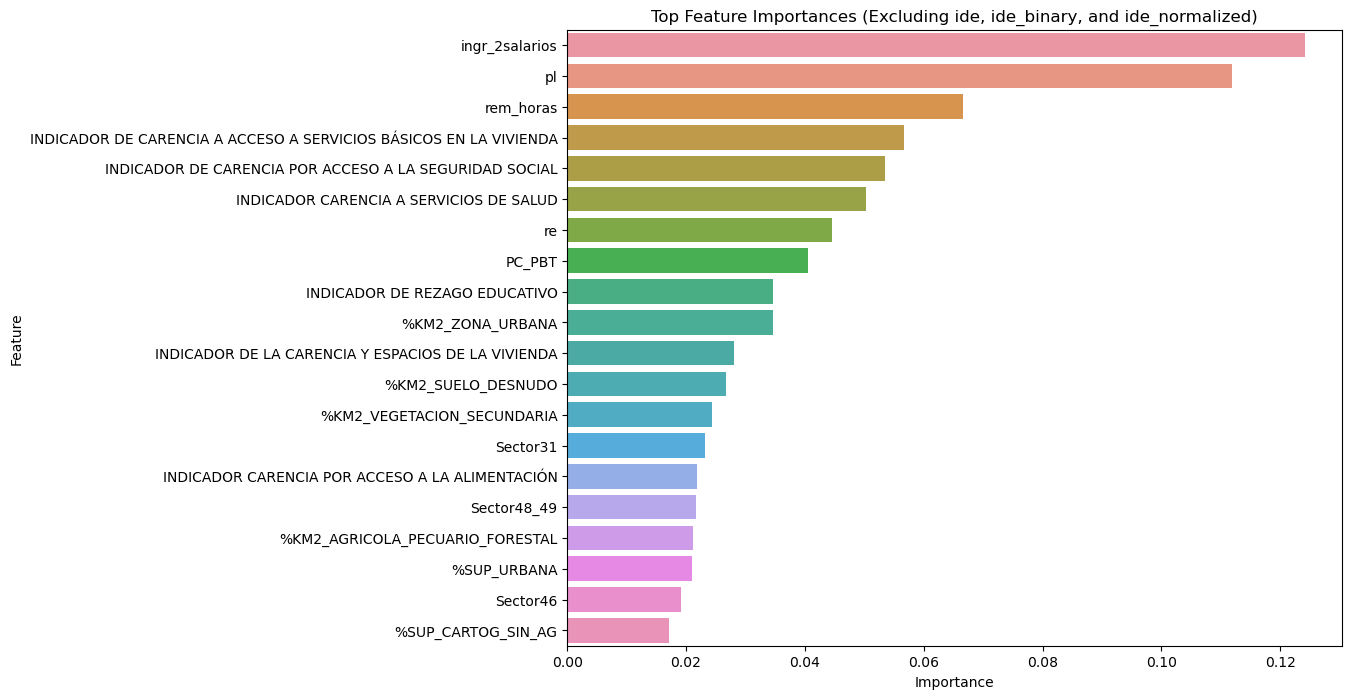

In [43]:
# Exclude 'ide' and 'ide_normalized' from the features
X = data_4_models_reordered.drop(['ide', 'ide_normalized', 'ide_binary'], axis=1)
y = data_4_models_reordered['ide_binary']

# Initial train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Create the Random Forest Classifier with the best parameters
random_forest = RandomForestClassifier(**best_params)

# Fit the model
random_forest.fit(X_train, y_train)

# Getting feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 
                                    'importance': random_forest.feature_importances_})

# Sort features according to importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Select top N features
top_features2 = feature_importances.head(20)  # top 20 features

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_features2)
plt.title('Top Feature Importances (Excluding ide, ide_binary, and ide_normalized)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [58]:
# Select top 20 features
top_features2 = feature_importances.head(20)

# Print the top 20 features in a numbered list
for i, row in enumerate(top_features2.itertuples(), start=1):
    print(f"{i}. {row.feature} (Importance: {row.importance})")

1. ingr_2salarios (Importance: 0.12423815706322285)
2. pl (Importance: 0.1119157633112548)
3. rem_horas (Importance: 0.06661385972238695)
4. INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA (Importance: 0.0567277912104239)
5. INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL (Importance: 0.053488534422533394)
6. INDICADOR CARENCIA A SERVICIOS DE SALUD (Importance: 0.05031741907025499)
7. re (Importance: 0.044639519386871815)
8. PC_PBT (Importance: 0.04056294970611916)
9. INDICADOR DE REZAGO EDUCATIVO (Importance: 0.03469459085619645)
10. %KM2_ZONA_URBANA (Importance: 0.03456227425151859)
11. INDICADOR DE LA CARENCIA Y ESPACIOS DE LA VIVIENDA (Importance: 0.028083389147608103)
12. %KM2_SUELO_DESNUDO (Importance: 0.026763353200184265)
13. %KM2_VEGETACION_SECUNDARIA (Importance: 0.0243134467341163)
14. Sector31 (Importance: 0.023133372586260255)
15. INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN (Importance: 0.02177401897860876)
16. Sector48_49 (Importance: 0.021614

- This is the optimized feature importance plot after doing hyperparameter tuning on our Random Forest classifier.

### Interpretation after hyperparameter tuning

**Interpretation and Comparison of Feature Importance Lists Before and After Hyperparameter Tuning of the Random Forest Model:**

Before Hyperparameter Tuning:

- All features had an equal importance score of 0.017054302128190924.
- This uniform importance suggests that the model might not have been effectively differentiating between the features' contributions.

After Hyperparameter Tuning:

- There's a noticeable variation in importance scores, indicating a more nuanced understanding of each feature's contribution.
ingr_2salarios, pl, and rem_horas remain the top three features, but their importance scores have significantly increased.
- INDICADOR DE CARENCIA A ACCESO A SERVICIOS BÁSICOS EN LA VIVIENDA and INDICADOR DE CARENCIA POR ACCESO A LA SEGURIDAD SOCIAL have moved up in the ranking, showing their increased relevance in the optimized model.
re dropped from 3rd to 7th place, indicating a relative decrease in its importance compared to other features.
- New features like INDICADOR CARENCIA POR ACCESO A LA ALIMENTACIÓN, Sector48_49, and %SUP_CARTOG_SIN_AG entered the top 20 list, suggesting that hyperparameter tuning allowed the model to uncover previously undervalued features.
- Some features like h_trab, Sector72, and Sector81 dropped out of the top 20, implying their lesser importance in the context of the optimized model.

Overall Impact of Hyperparameter Tuning:

- The shift in feature importance rankings and the variation in their scores indicate a more effective and discriminating use of the features by the optimized model.
- The model is now likely better at capturing the complex relationships and relative importance of various features in predicting the target variable.
- This adjustment in feature importance underscores the value of hyperparameter tuning in refining a model's understanding of the data and improving its predictive performance.

## Testing other models for classification of municipal development (ide)

Now let's try out Support Vector Classification. Some advantages of this alternative method are: 

- High Effectiveness in High Dimensional Spaces: SVC performs well with datasets having a large number of features, maintaining accuracy even in complex feature spaces.
- Versatility with Kernel Functions: The ability to use different kernel functions allows SVC to handle both linear and non-linear relationships effectively.
- Robustness Against Overfitting: Especially in scenarios where the number of features exceeds the number of samples, SVC tends to be more resistant to overfitting compared to other classifiers.

### Support Vector Classifier (SVC)

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create SVM classifier
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Print metrics
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")
print(f"SVM ROC-AUC Score: {roc_auc_svm}")


SVM Accuracy: 0.5384615384615384
SVM Precision: 0.5384615384615384
SVM Recall: 0.5384615384615384
SVM F1 Score: 0.5384615384615384
SVM ROC-AUC Score: 0.5384615384615384


Interpretation of SVC Results:

- Accuracy, Precision, Recall, F1 Score, ROC-AUC: All metrics for the SVC model are at 53.85%. This uniformity suggests that the model performs moderately and similarly across all these metrics, indicating a balanced but not highly accurate or discriminative performance.
- Comparison with Optimized Random Forest:
- Higher Performance Metrics in Random Forest: The optimized Random Forest model outperforms the SVC in all metrics. The Random Forest had an accuracy of 76.92%, precision of 81.82%, recall of 69.23%, F1 score of 75%, and ROC-AUC score of 76.92%.
- Better Balance and Discrimination in Random Forest: The Random Forest model demonstrates a better balance between precision and recall and a superior ability to distinguish between classes.

Overall Effectiveness: The optimized Random Forest model is overall more effective and accurate compared to the SVC model in this specific scenario.

### Gradient Boosting Classifier

Now let's try the Gradient Boosting classifier as an alternative to our optimized Random Forest model. Some pros of this model are:

- High Performance: Often provides high accuracy and effectiveness, especially for complex datasets where relationships between variables are not linear.
- Handling of Various Types of Data: Works well with both numerical and categorical data and can handle missing data effectively.
- Flexibility: Allows for optimization of different loss functions, making it adaptable to various problems and requirements.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Calculate metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Print metrics
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Precision: {precision_gb}")
print(f"Gradient Boosting Recall: {recall_gb}")
print(f"Gradient Boosting F1 Score: {f1_gb}")
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gb}")


Gradient Boosting Accuracy: 0.6153846153846154
Gradient Boosting Precision: 0.6153846153846154
Gradient Boosting Recall: 0.6153846153846154
Gradient Boosting F1 Score: 0.6153846153846154
Gradient Boosting ROC-AUC Score: 0.6153846153846154


Interpretation and Comparison with Optimized Random Forest:

Gradient Boosting Results:

- Uniform Metrics: All performance metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC) are at 61.54%, indicating a consistent but moderate level of performance across various aspects of the model.

Comparison with Optimized Random Forest:

- Random Forest Shows Higher Metrics: The optimized Random Forest model surpasses the Gradient Boosting in all metrics with accuracy at 76.92%, precision at 81.82%, recall at 69.23%, F1 score at 75%, and ROC-AUC at 76.92%.
- Better Discrimination and Balance in Random Forest: The Random Forest model not only shows higher accuracy but also a better balance between precision and recall and a superior ability to distinguish between classes compared to the Gradient Boosting model in this scenario.

### Hyperparameter tuning attempt for Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_dist_gb = {
    'n_estimators': np.arange(50, 400, 50),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 15, 1),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['sqrt', 'log2', None]
}

# Create a GradientBoostingClassifier object
gb_clf = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gb_clf, param_distributions=param_dist_gb, 
                                      n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)

# Assuming you have your features (X) and target (y) already defined
# Fit RandomizedSearchCV to the training data
random_search_gb.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search_gb.best_params_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming random_search_gb is your RandomizedSearchCV object
best_params = random_search_gb.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create a new classifier
optimized_gb_clf = GradientBoostingClassifier(**best_params)

# Train the classifier on the training set
optimized_gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized_gb = optimized_gb_clf.predict(X_test)

# Calculate performance metrics
accuracy_optimized_gb = accuracy_score(y_test, y_pred_optimized_gb)
precision_optimized_gb = precision_score(y_test, y_pred_optimized_gb)
recall_optimized_gb = recall_score(y_test, y_pred_optimized_gb)
f1_optimized_gb = f1_score(y_test, y_pred_optimized_gb)
roc_auc_optimized_gb = roc_auc_score(y_test, y_pred_optimized_gb)

# Print performance metrics
print(f"Optimized Gradient Boosting Accuracy: {accuracy_optimized_gb}")
print(f"Optimized Gradient Boosting Precision: {precision_optimized_gb}")
print(f"Optimized Gradient Boosting Recall: {recall_optimized_gb}")
print(f"Optimized Gradient Boosting F1 Score: {f1_optimized_gb}")
print(f"Optimized Gradient Boosting ROC-AUC Score: {roc_auc_optimized_gb}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}
Optimized Gradient Boosting Accuracy: 0.6923076923076923
Optimized Gradient Boosting Precision: 0.7777777777777778
Optimized Gradient Boosting Recall: 0.5384615384615384
Optimized Gradient Boosting F1 Score: 0.6363636363636364
Optimized Gradient Boosting ROC-AUC Score: 0.6923076923076922


- In summary, while we manage to improve the metrics for the Gradient Boosting algorithm, it still doesn't surpass the optimized metrics established by the Random Forest algorithm.
- Due to the limited time and resources of our analysis, we will limit our model comparison the ones above. Random Forest, therefore, seems to be the most effective model for the feature importance algorithm for out demographic data.

# Part 3: Conclusion and Recommendations

**Final Reflections:**

- **Data Preprocessing and EDA:** The initial steps of data preprocessing and exploratory data analysis (EDA) established a strong foundation for the analysis. Selection and normalization of relevant variables from diverse data tables (sociodemographic, economic, and land/vegetation) ensured a comprehensive approach to understanding municipal development.

- **Model Selection and Optimization:** The choice to use Random Forest for feature importance analysis was prudent, given its robustness and ability to handle non-linear relationships. The hyperparameter tuning further optimized the model, as evidenced by the significant improvement in all key metrics (accuracy, precision, recall, F1 score, and ROC-AUC).

- **Comparison with Other Models:** The comparison with Logistic Regression and Gradient Boosting models highlighted the superiority of the optimized Random Forest model in this specific context. The consistent outperformance across various metrics underscores its suitability for the project's goals.

**Limitations:**

- **Time Constraint:** The three-week time frame imposed constraints on the extent of data exploration and model experimentation. Although sufficient for preliminary analysis, a longer project duration might allow for more in-depth exploration of alternative models and techniques.

- **Model Complexity and Interpretability:** While Random Forest provided robust predictions, its inherent complexity as an ensemble method might pose challenges in terms of interpretability compared to simpler models.

- Potential Data Limitations: The reliance on existing datasets may have limited the analysis, especially considering recent geographical changes and missing data for newly established municipalities.

**Recommendations for INEGI:**

- **Focus on Identified Key Features:** Based on the optimized Random Forest model, INEGI should prioritize the top features identified (like 'ingr_2salarios', 'pl', 're', etc.) in their data collection and analysis efforts for municipal development.

- **Further Data Collection:** For newly established municipalities or areas with incomplete data, additional data collection efforts could be beneficial to enhance the model's accuracy and applicability.

- **Model Expansion and Regular Updates:** Consider expanding the model to include more states or nationwide data, and regularly update the model with new data to maintain its relevance and accuracy.

- **Exploration of Alternative Models:** While the Random Forest model was effective, exploring other models or ensemble methods could provide additional insights, especially in terms of interpretability and handling of any non-linear relationships in the data.

- **Policy Implementation:** Utilize the insights from this analysis to guide policy decisions and resource allocation, focusing on the areas and aspects identified as most influential in municipal development.

**Closing Note:**

This internship project at INEGI has not only contributed to a better understanding of the factors influencing municipal development but also highlighted the potential of machine learning in guiding policy-making and resource allocation. The successful application of feature importance algorithms like Random Forest can serve as a model for future analyses and decision-making processes within INEGI. Thank you so much, INEGI staff, Tsikbal, Centre College, and my coordinators (Joaquín Zambrano and Arturo Gomez) for being so supportive throughout this internship.

# References

_Libraries and Algorithms Documentation:_

- Pandas (Data Manipulation Library)
    - Documentation: https://pandas.pydata.org/pandas-docs/stable/  
- Scikit-learn (Machine Learning Library)
- RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- GradientBoostingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- SVC (Support Vector Classifier): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Model Evaluation Metrics (accuracy_score, precision_score, etc.): https://scikit-learn.org/stable/modules/model_evaluation.html
- Train Test Split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- RandomizedSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- Matplotlib (Plotting Library)
    - Documentation: https://matplotlib.org/3.1.1/contents.html
- Seaborn (Statistical Data Visualization)
    - Documentation: https://seaborn.pydata.org/
- MinMaxScaler (Feature Scaling)
    - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- Recommended Book:
    - _"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"_ by Aurélien Géron. This book provides a practical understanding of machine learning with Python libraries. It offers detailed explanations and examples for algorithms like Random Forest, SVC, and Gradient Boosting, making it a valuable resource for understanding these methods in real-world scenarios.